In [266]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import calinski_harabaz_score
import seaborn as sns
import matplotlib.pyplot as plt


In [140]:
data = pd.read_csv('user_profile.csv',index_col='user_id')
scores = pd.read_csv('user_score_match.csv')

In [160]:
other = pd.read_csv('sample_score_details.csv',index_col='user_id')

In [164]:
other.columns

Index(['Unnamed: 0', 'session_length', 'view_sum', 'click_count', 'Score'], dtype='object')

In [167]:
other.drop('Unnamed: 0',axis=1,inplace=True)

In [171]:
data = data.join(other.iloc[:,:-1],how='outer')

In [141]:
data.dropna(inplace=True)

In [142]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
data['clusters'] = kmeans.labels_ + 1

In [112]:
data.loc[data['clusters']==3,'credit_score_bucket'].mean()

0.33795853269537524

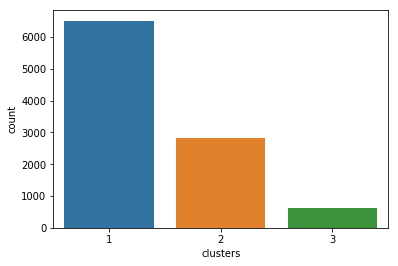

In [113]:
sns.countplot(data['clusters'])

In [114]:
calinski_harabaz_score(data.iloc[:,:-1], data['clusters'])

9409.279949069649

In [150]:
data['scores'] = scores['score'].values

In [172]:
data.head()

,credit_score_bucket,max_cc_limit,total_mortgage_loans_balance,total_mortgage_loans_amount,total_auto_loans_balance,total_student_loans_balance,count_bankruptcy,gender_Female,gender_Male,gender_Unisex,...,action_type_CLICK_APPLY,action_type_LOGGED_IN,action_type_VIEW_OFFER,action_type_VIEW_PAGE,action_type_nan,clusters,scores,session_length,view_sum,click_count
user_id,,,,,,,,,,,,,,,,,,,,,
8973c0db8011a72fae991b7e817150e7bc81f269,0.283333,0.0000,0.000000,0.000000,0.019519,0.196976,0,1,0,0,...,0.0,2.0,14.0,6.0,0.0,1,0.000372,522,29,15
cc04f0191a9721bb62813ff27c870e804d3cc66b,0.300000,0.0700,0.023849,0.023554,0.014457,0.060833,0,0,0,1,...,1.0,1.0,15.0,5.0,0.0,3,0.001325,1940,36,40
afc8a68a0c0a10b5edcb7cb76d4a7935a1059f98,0.383333,0.0015,0.000000,0.000000,0.000000,0.065771,0,0,0,0,...,0.0,1.0,28.0,14.0,0.0,3,0.000622,896,21,29
9309f14fdf2bc855880b4208c206de68dd473b1a,0.266667,0.0000,0.000000,0.000000,0.009511,0.000000,0,1,0,0,...,1.0,1.0,5.0,2.0,0.0,1,0.000323,471,9,11
5a382c9ee4b528470a9c436eff40a670df869fe1,0.766667,0.0500,0.000000,0.000000,0.000000,0.000000,0,0,1,0,...,6.0,2.0,50.0,26.0,0.0,2,0.001677,2351,84,116


Text(0,0.5,'user_engagement')

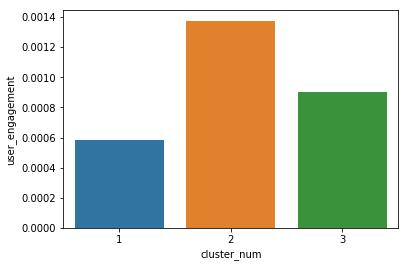

In [267]:
sns.barplot(x= ['1','2','3'],y=[data.loc[data['clusters']==1,'scores'].mean(),data.loc[data['clusters']==2,'scores'].mean(),data.loc[data['clusters']==3,'scores'].mean()])
plt.xlabel('cluster_num')
plt.ylabel('user_engagement')

Text(0,0.5,'click_count')

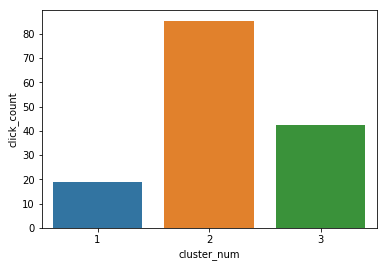

In [268]:
sns.barplot(x= ['1','2','3'],y=[data.loc[data['clusters']==1,'click_count'].mean(),data.loc[data['clusters']==2,'click_count'].mean(),data.loc[data['clusters']==3,'click_count'].mean()])
plt.xlabel('cluster_num')
plt.ylabel('click_count')

Text(0,0.5,'view_sum')

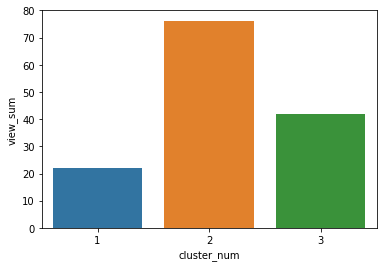

In [269]:
sns.barplot(x= ['1','2','3'],y=[data.loc[data['clusters']==1,'view_sum'].mean(),data.loc[data['clusters']==2,'view_sum'].mean(),data.loc[data['clusters']==3,'view_sum'].mean()])
plt.xlabel('cluster_num')
plt.ylabel('view_sum')

Text(0,0.5,'session_length')

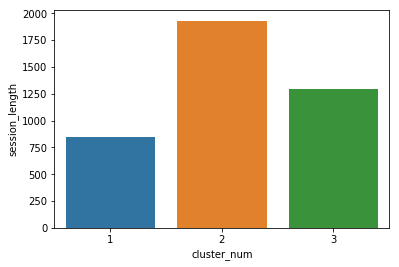

In [270]:
sns.barplot(x= ['1','2','3'],y=[data.loc[data['clusters']==1,'session_length'].mean(),data.loc[data['clusters']==2,'session_length'].mean(),data.loc[data['clusters']==3,'session_length'].mean()])
plt.xlabel('cluster_num')
plt.ylabel('session_length')

In [189]:
[data.loc[data['clusters']==1,'scores'].mean(),data.loc[data['clusters']==2,'scores'].mean(),data.loc[data['clusters']==3,'scores'].mean()] 

[0.0005852176358609221, 0.001375353856053008, 0.0009039799056559696]

In [193]:
plot_data = pd.DataFrame()
plot_data['cluster'] = [1,2,3]
plot_data['size'] = [6500,628,2840]
plot_data['engagement_score'] = [data.loc[data['clusters']==1,'scores'].mean(),data.loc[data['clusters']==2,'scores'].mean(),data.loc[data['clusters']==3,'scores'].mean()] 
plot_data['click_score'] = [data.loc[data['clusters']==1,'click_count'].mean(),data.loc[data['clusters']==2,'click_count'].mean(),data.loc[data['clusters']==3,'click_count'].mean()]
plot_data['view_sum'] = [data.loc[data['clusters']==1,'view_sum'].mean(),data.loc[data['clusters']==2,'view_sum'].mean(),data.loc[data['clusters']==3,'view_sum'].mean()]
plot_data['session_length'] = [data.loc[data['clusters']==1,'session_length'].mean(),data.loc[data['clusters']==2,'session_length'].mean(),data.loc[data['clusters']==3,'session_length'].mean()]


In [195]:
#plot_data.to_csv('plot_data.csv')

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


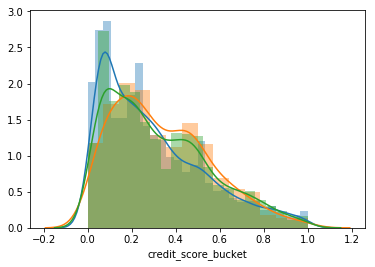

In [208]:
# credit score

sns.distplot(data.loc[data['clusters']==1,'credit_score_bucket'])
sns.distplot(data.loc[data['clusters']==2,'credit_score_bucket'])
sns.distplot(data.loc[data['clusters']==3,'credit_score_bucket'])

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


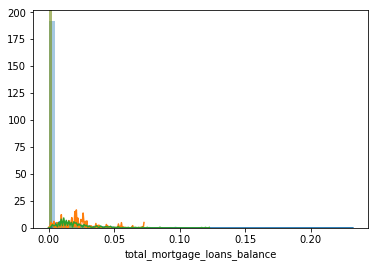

In [210]:
# mortgage

sns.distplot(data.loc[data['clusters']==1,'total_mortgage_loans_balance'])
sns.distplot(data.loc[data['clusters']==2,'total_mortgage_loans_balance'])
sns.distplot(data.loc[data['clusters']==3,'total_mortgage_loans_balance'])

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


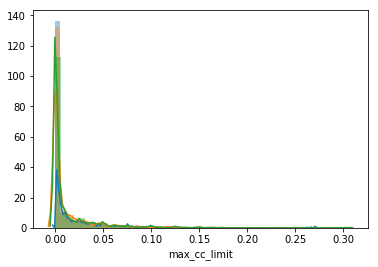

In [211]:
sns.distplot(data.loc[data['clusters']==1,'max_cc_limit'])
sns.distplot(data.loc[data['clusters']==2,'max_cc_limit'])
sns.distplot(data.loc[data['clusters']==3,'max_cc_limit'])

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


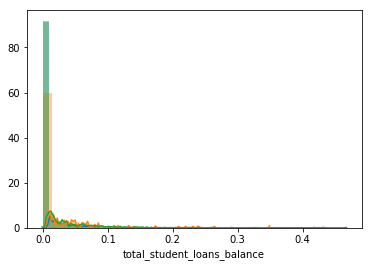

In [212]:
sns.distplot(data.loc[data['clusters']==1,'total_student_loans_balance'])
sns.distplot(data.loc[data['clusters']==2,'total_student_loans_balance'])
sns.distplot(data.loc[data['clusters']==3,'total_student_loans_balance'])

In [ ]:
########

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


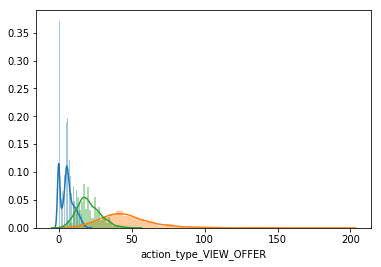

In [219]:
# view offer

sns.distplot(data.loc[data['clusters']==1,'action_type_VIEW_OFFER'])
sns.distplot(data.loc[data['clusters']==2,'action_type_VIEW_OFFER'])
sns.distplot(data.loc[data['clusters']==3,'action_type_VIEW_OFFER'])

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


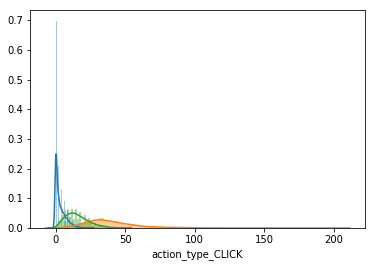

In [259]:
sns.distplot(data.loc[data['clusters']==1,'action_type_CLICK'])
sns.distplot(data.loc[data['clusters']==2,'action_type_CLICK'])
sns.distplot(data.loc[data['clusters']==3,'action_type_CLICK'])

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


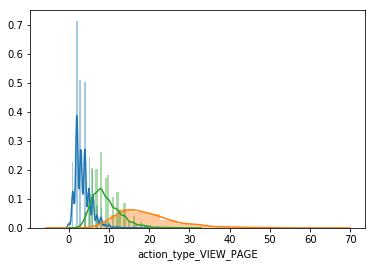

In [261]:
sns.distplot(data.loc[data['clusters']==1,'action_type_VIEW_PAGE'])
sns.distplot(data.loc[data['clusters']==2,'action_type_VIEW_PAGE'])
sns.distplot(data.loc[data['clusters']==3,'action_type_VIEW_PAGE'])

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


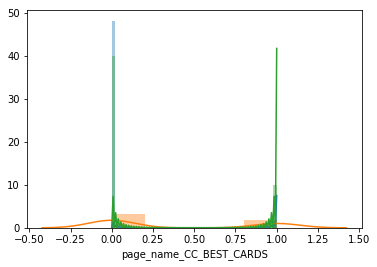

In [226]:
# view offer

sns.distplot(data.loc[data['clusters']==1,'page_name_CC_BEST_CARDS'])
sns.distplot(data.loc[data['clusters']==2,'page_name_CC_BEST_CARDS'])
sns.distplot(data.loc[data['clusters']==3,'page_name_CC_BEST_CARDS'])

In [244]:
col = []
xy = []
yz = []
xz = []

for x in data.columns:
    clus_1 = data.loc[data['clusters']==1,x].mean()
    clus_2 = data.loc[data['clusters']==2,x].mean()
    clus_3 = data.loc[data['clusters']==3,x].mean()
    col.append(x)
    xy.append(abs(clus_1-clus_2))
    yz.append(abs(clus_2-clus_3))
    xz.append(abs(clus_1-clus_3))


In [245]:
test = pd.DataFrame()
test['cols'] = col
test['xy'] = xy
test['yz'] = yz
test['xz'] = xz
test['score'] = test['xy'] + test['yz'] + test['xz']

In [258]:
test.sort_values(by=['score']).head(10)

,cols,xy,yz,xz,score
68,browser_name_Chrome 29,0.0,0.0,0.0,0.0
99,browser_name_Firefox 17,0.0,0.0,0.0,0.0
98,browser_name_Firefox 16,0.0,0.0,0.0,0.0
97,browser_name_Firefox 15,0.0,0.0,0.0,0.0
96,browser_name_Firefox 14,0.0,0.0,0.0,0.0
95,browser_name_Firefox 12,0.0,0.0,0.0,0.0
94,browser_name_Firefox 11,0.0,0.0,0.0,0.0
93,browser_name_Firefox 1.5,0.0,0.0,0.0,0.0
138,browser_name_Internet Explorer 10,0.0,0.0,0.0,0.0
87,browser_name_Chrome 48,0.0,0.0,0.0,0.0


In [254]:
test.drop([177],inplace=True)

In [256]:
test.sort_values(by=['score'],ascending=False)[3:].head(15)

,cols,xy,yz,xz,score
174,action_type_VIEW_OFFER,40.623804,25.972123,14.651681,81.247608
171,action_type_CLICK,35.457581,23.252173,12.205407,70.915161
175,action_type_VIEW_PAGE,15.808366,10.112784,5.695582,31.616731
172,action_type_CLICK_APPLY,0.798429,0.521228,0.277202,1.596858
18,page_name_MY_CREDIT,0.697682,0.147921,0.549761,1.395363
21,page_name_MY_RECOMMENDATIONS,0.695642,0.146219,0.549424,1.391285
17,page_name_MY_BORROWING_POWER,0.668363,0.212665,0.455698,1.336725
173,action_type_LOGGED_IN,0.561347,0.329950,0.231398,1.122695
20,page_name_MY_DEBT,0.485000,0.268036,0.216964,0.970001
41,offer_product_PERSONAL_LOANS,0.372717,0.049074,0.323644,0.745435


In [224]:
data.columns[0:25]

Index(['credit_score_bucket', 'max_cc_limit', 'total_mortgage_loans_balance',
       'total_mortgage_loans_amount', 'total_auto_loans_balance',
       'total_student_loans_balance', 'count_bankruptcy', 'gender_Female',
       'gender_Male', 'gender_Unisex', 'gender_nan', 'page_name_AOOP_OVERVIEW',
       'page_name_CC_BEST_CARDS', 'page_name_CC_DETAILS',
       'page_name_CC_MARKETPLACE', 'page_name_CREDIT_MONITORING',
       'page_name_LOG_IN', 'page_name_MY_BORROWING_POWER',
       'page_name_MY_CREDIT', 'page_name_MY_CREDIT_REPORT',
       'page_name_MY_DEBT', 'page_name_MY_RECOMMENDATIONS',
       'page_name_NO_PRE_QUAL_OFFERS', 'page_name_OVERVIEW',
       'page_name_PL_MARKETPLACE'],
      dtype='object')

In [197]:
sns.distplot(data.loc)

,credit_score_bucket,max_cc_limit,total_mortgage_loans_balance,total_mortgage_loans_amount,total_auto_loans_balance,total_student_loans_balance,count_bankruptcy,gender_Female,gender_Male,gender_Unisex,...,action_type_CLICK_APPLY,action_type_LOGGED_IN,action_type_VIEW_OFFER,action_type_VIEW_PAGE,action_type_nan,clusters,scores,session_length,view_sum,click_count
user_id,,,,,,,,,,,,,,,,,,,,,
8973c0db8011a72fae991b7e817150e7bc81f269,0.283333,0.00000,0.000000,0.000000,0.019519,0.196976,0,1,0,0,...,0.0,2.0,14.0,6.0,0.0,1,0.000372,522,29,15
cc04f0191a9721bb62813ff27c870e804d3cc66b,0.300000,0.07000,0.023849,0.023554,0.014457,0.060833,0,0,0,1,...,1.0,1.0,15.0,5.0,0.0,3,0.001325,1940,36,40
afc8a68a0c0a10b5edcb7cb76d4a7935a1059f98,0.383333,0.00150,0.000000,0.000000,0.000000,0.065771,0,0,0,0,...,0.0,1.0,28.0,14.0,0.0,3,0.000622,896,21,29
9309f14fdf2bc855880b4208c206de68dd473b1a,0.266667,0.00000,0.000000,0.000000,0.009511,0.000000,0,1,0,0,...,1.0,1.0,5.0,2.0,0.0,1,0.000323,471,9,11
5a382c9ee4b528470a9c436eff40a670df869fe1,0.766667,0.05000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,...,6.0,2.0,50.0,26.0,0.0,2,0.001677,2351,84,116
da2c15e3daf15a2ba1e95fa08ab282e9035b6846,0.016667,0.00000,0.000000,0.000000,0.009325,0.000000,0,1,0,0,...,0.0,2.0,32.0,14.0,0.0,3,0.001456,2008,106,101
24304e10556fea50341f79f6734c69083771cab4,0.283333,0.00000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0.0,2.0,24.0,8.0,0.0,3,0.000150,216,12,0
4a0e43cf7444c41333a94c160e3a14ece3557d74,0.066667,0.00000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,...,0.0,2.0,26.0,18.0,0.0,3,0.000291,375,36,32
b428504b3f42555444071f1d5dc3ec8d701c0ef4,0.466667,0.07600,0.000000,0.000000,0.006740,0.000000,0,0,1,0,...,0.0,1.0,5.0,2.0,0.0,1,0.000273,412,3,0
